Analysis of the calexps used for the coadds of the Decam Galactic Bulge Survey (Saha)
====

## A look at the inputs to the coadds

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
#import psycopg2

from astropy.coordinates import SkyCoord
import astropy.units as u

import lsst.daf.persistence as dafPersist

In [2]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("matplotlib")

In [3]:
sys.path.append('/project/mrawls/ap_pipe-notebooks/')
import diaObjectAnalysis as doa
import apdbPlots as pla

In [4]:
repo = '/project/sullivan/saha/processed_data'

In [5]:
butler = dafPersist.Butler(repo)

In [6]:
full_ccd_list = np.arange(63)

## Define the visits associated with each field/year/band

In [7]:
visits_B1_2013_i = [205419,205490,205532,205705,205736,205768,209472,209534,209582,209784,209826,209880,210108,210112,210163,210216,210269,210305,210506,210553,210595,210631,210667,216042,216043,216044,216045,216046,216058,216070,216082,216094,216106,216118,216130,216142,216988,217027,217037,217047,217057,217067,217077,217087,223463,223499,223536,223572,223795,223831,223867,223903]

In [8]:
visits_B1_2013_g = [205421,205492,205534,205707,205738,205770,209474,209536,209584,209786,209828,209882,210110,210165,210218,210271,210307,210508,210555,210597,210633,210669,223465,223501,223538,223574,223797,223833,223869,223905]

In [9]:
visits_B1_2015_g = [427318,427333,427348,427368,427398,427428,427458,427488,427518,427548,427578,427628,427653,427938,427953,427978,428003,428033,428063,428093,428123,428153,428183,428213,428243,428273,428293,428336,428624,428639,428659,428684,428714,428744,428774,428804,428834,428864,428894,428924,428954,428984,429014,429044]

In [10]:
visits_B1_2015_i = [427316,427331,427346,427366,427396,427426,427456,427486,427516,427546,427576,427616,427651,427936,427951,427976,428001,428031,428061,428091,428121,428151,428181,428211,428241,428271,428291,428334,428622,428637,428657,428682,428712,428742,428772,428802,428832,428862,428892,428922,428952,428982,429012,429042]

In [11]:
visits_B2_2013_g = [205429,205498,205540,205712,205744,205775,209480,209542,209590,209792,209834,209888,209942,210118,210171,210224,210277,210317,210514,210561,210603,210639,210675,223471,223507,223544,223580,223803,223839,223875,223911]

In [12]:
visits_B2_2013_i = [205427,205496,205538,205710,205742,205773,209478,209540,209588,209790,209832,209886,209940,210116,210169,210222,210275,210315,210512,210559,210601,210637,210673,216048,216060,216072,216084,216096,216108,216120,216132,216144,216990,217002,217029,217039,217049,217059,217069,217079,217089,223469,223505,223542,223578,223801,223837,223873,223909]

In [13]:
visits_B2_2015_g = [427323,427338,427353,427373,427403,427433,427463,427493,427523,427553,427583,427626,427658,427943,427958,427983,428008,428038,428068,428098,428128,428158,428188,428218,428248,428278,428298,428341,428629,428644,428664,428689,428719,428749,428779,428809,428839,428869,428899,428929,428959,428989,429019,429049]

In [14]:
visits_B2_2015_i = [427321,427336,427351,427371,427401,427431,427461,427491,427521,427551,427581,427624,427656,427941,427956,427981,428006,428036,428066,428096,428126,428156,428186,428216,428246,428276,428296,428339,428627,428642,428662,428687,428717,428747,428777,428807,428837,428867,428897,428927,428957,428987,429017,429047]

In [15]:
ccd_use = 42
sigma2fwhm = 2.*np.sqrt(2.*np.log(2.))

## Read in one ccd from each visit to extract the psf

In [16]:
psf_B1_2013_i_dict = {}
for visit in visits_B1_2013_i:
    psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B1_2013_i_dict[visit] = fwhm

Visit 205419 ccd 42 has PSF fwhm 5.840769298118124
Visit 205490 ccd 42 has PSF fwhm 4.950917661449323
Visit 205532 ccd 42 has PSF fwhm 4.870604723136765
Visit 205705 ccd 42 has PSF fwhm 4.48718287617988
Visit 205736 ccd 42 has PSF fwhm 4.181305023428948
Visit 205768 ccd 42 has PSF fwhm 4.212601023303875
Visit 209472 ccd 42 has PSF fwhm 3.34710987438908
Visit 209534 ccd 42 has PSF fwhm 3.477255469560027
Visit 209582 ccd 42 has PSF fwhm 3.296696521929344
Visit 209784 ccd 42 has PSF fwhm 4.553814201553745
Visit 209826 ccd 42 has PSF fwhm 3.9711761583157927
Visit 209880 ccd 42 has PSF fwhm 3.850659762743467
Visit 210108 ccd 42 has PSF fwhm 4.476169305558979
Visit 210112 ccd 42 has PSF fwhm 3.748910176997351
Visit 210163 ccd 42 has PSF fwhm 3.702168983688819
Visit 210216 ccd 42 has PSF fwhm 3.5020502176609627
Visit 210269 ccd 42 has PSF fwhm 3.8966540291518004
Visit 210305 ccd 42 has PSF fwhm 4.0886167900742
Visit 210506 ccd 42 has PSF fwhm 4.565825651170693
Visit 210553 ccd 42 has PSF fwhm

In [17]:
psf_B1_2013_g_dict = {}
for visit in visits_B1_2013_g:
    psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B1_2013_g_dict[visit] = fwhm

Visit 205421 ccd 42 has PSF fwhm 6.388871374107783
Visit 205492 ccd 42 has PSF fwhm 5.895939888401514
Visit 205534 ccd 42 has PSF fwhm 5.192832352841658
Visit 205707 ccd 42 has PSF fwhm 5.063136571274958
Visit 205738 ccd 42 has PSF fwhm 4.909291205367142
Visit 205770 ccd 42 has PSF fwhm 4.977583119239433
Visit 209474 ccd 42 has PSF fwhm 3.737022584018945
Visit 209536 ccd 42 has PSF fwhm 3.8431450540165537
Visit 209584 ccd 42 has PSF fwhm 4.03967982660855
Visit 209786 ccd 42 has PSF fwhm 5.146441562183318
Visit 209828 ccd 42 has PSF fwhm 4.413791869029657
Visit 209882 ccd 42 has PSF fwhm 4.099009763292883
Visit 210110 ccd 42 has PSF fwhm 4.875343009463469
Visit 210165 ccd 42 has PSF fwhm 3.683576633374412
Visit 210218 ccd 42 has PSF fwhm 3.7859554982493395
Visit 210271 ccd 42 has PSF fwhm 4.287026119479217
Visit 210307 ccd 42 has PSF fwhm 5.847890108849376
Visit 210508 ccd 42 has PSF fwhm 5.800336439635274
Visit 210555 ccd 42 has PSF fwhm 4.341067108528618
Visit 210597 ccd 42 has PSF fw

In [16]:
psf_B1_2015_i_dict = {}
for visit in visits_B1_2015_i:
    psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B1_2015_i_dict[visit] = fwhm

Visit 427316 ccd 42 has PSF fwhm 3.633006553300056
Visit 427331 ccd 42 has PSF fwhm 3.7318710056514237
Visit 427346 ccd 42 has PSF fwhm 3.5548126958140305
Visit 427366 ccd 42 has PSF fwhm 4.046085993182661
Visit 427396 ccd 42 has PSF fwhm 3.949546514599138
Visit 427426 ccd 42 has PSF fwhm 3.3972649725765867
Visit 427456 ccd 42 has PSF fwhm 3.30270026130923
Visit 427486 ccd 42 has PSF fwhm 3.499321250262532
Visit 427516 ccd 42 has PSF fwhm 3.4243149707564804
Visit 427546 ccd 42 has PSF fwhm 3.123623739016658
Visit 427576 ccd 42 has PSF fwhm 3.3776953196693906
Visit 427616 ccd 42 has PSF fwhm 3.6620479825006664
Visit 427651 ccd 42 has PSF fwhm 3.2649679322632488
Visit 427936 ccd 42 has PSF fwhm 3.3621135328116942
Visit 427951 ccd 42 has PSF fwhm 3.44393218612088
Visit 427976 ccd 42 has PSF fwhm 3.9764891135490874
Visit 428001 ccd 42 has PSF fwhm 4.021421082067493
Visit 428031 ccd 42 has PSF fwhm 3.3491082751650376
Visit 428061 ccd 42 has PSF fwhm 3.355841377723454
Visit 428091 ccd 42 has

In [17]:
psf_B1_2015_g_dict = {}
for visit in visits_B1_2015_g:
    psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B1_2015_g_dict[visit] = fwhm

Visit 427318 ccd 42 has PSF fwhm 4.121002337199659
Visit 427333 ccd 42 has PSF fwhm 5.070450666121519
Visit 427348 ccd 42 has PSF fwhm 4.694205484652768
Visit 427368 ccd 42 has PSF fwhm 5.319269992924608
Visit 427398 ccd 42 has PSF fwhm 4.0873498745799965
Visit 427428 ccd 42 has PSF fwhm 3.9245130464323577
Visit 427458 ccd 42 has PSF fwhm 4.180082735175827
Visit 427488 ccd 42 has PSF fwhm 4.159897968310722
Visit 427518 ccd 42 has PSF fwhm 4.239011981954204
Visit 427548 ccd 42 has PSF fwhm 3.717235288497772
Visit 427578 ccd 42 has PSF fwhm 3.665998297420973
Visit 427628 ccd 42 has PSF fwhm 3.8221148853433773
Visit 427653 ccd 42 has PSF fwhm 4.210254877288624
Visit 427938 ccd 42 has PSF fwhm 4.28127607016713
Visit 427953 ccd 42 has PSF fwhm 3.801379578969797
Visit 427978 ccd 42 has PSF fwhm 4.814779803246472
Visit 428003 ccd 42 has PSF fwhm 4.991740039734217
Visit 428033 ccd 42 has PSF fwhm 4.2573175041658295
Visit 428063 ccd 42 has PSF fwhm 3.7829434094823804
Visit 428093 ccd 42 has PSF

In [20]:
psf_B2_2013_i_dict = {}
for visit in visits_B2_2013_i:
    if visit == 217002:
        continue
    psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B2_2013_i_dict[visit] = fwhm

Visit 205427 ccd 42 has PSF fwhm 5.784197533489828
Visit 205496 ccd 42 has PSF fwhm 4.367085098849008
Visit 205538 ccd 42 has PSF fwhm 4.747942082014723
Visit 205710 ccd 42 has PSF fwhm 4.34451750292452
Visit 205742 ccd 42 has PSF fwhm 3.76934956211847
Visit 205773 ccd 42 has PSF fwhm 4.329826574672896
Visit 209478 ccd 42 has PSF fwhm 3.5977814661156127
Visit 209540 ccd 42 has PSF fwhm 3.862190233710252
Visit 209588 ccd 42 has PSF fwhm 3.608695127309542
Visit 209790 ccd 42 has PSF fwhm 4.617894996179242
Visit 209832 ccd 42 has PSF fwhm 3.7137301064000625
Visit 209886 ccd 42 has PSF fwhm 4.073658574653529
Visit 209940 ccd 42 has PSF fwhm 6.095150537641505
Visit 210116 ccd 42 has PSF fwhm 4.491631266836462
Visit 210169 ccd 42 has PSF fwhm 3.730832330510874
Visit 210222 ccd 42 has PSF fwhm 3.4365561333536463
Visit 210275 ccd 42 has PSF fwhm 3.7987146613871445
Visit 210315 ccd 42 has PSF fwhm 4.768579255734517
Visit 210512 ccd 42 has PSF fwhm 3.9394471932292614
Visit 210559 ccd 42 has PSF 

In [21]:
psf_B2_2013_g_dict = {}
for visit in visits_B2_2013_g:
    psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B2_2013_g_dict[visit] = fwhm

Visit 205429 ccd 42 has PSF fwhm 6.328799195668618
Visit 205498 ccd 42 has PSF fwhm 5.0546208753880775
Visit 205540 ccd 42 has PSF fwhm 5.649261719228999
Visit 205712 ccd 42 has PSF fwhm 4.63986134749197
Visit 205744 ccd 42 has PSF fwhm 4.352342708715635
Visit 205775 ccd 42 has PSF fwhm 5.040553174135712
Visit 209480 ccd 42 has PSF fwhm 4.531305833880642
Visit 209542 ccd 42 has PSF fwhm 4.234984258762364
Visit 209590 ccd 42 has PSF fwhm 4.032306900101085
Visit 209792 ccd 42 has PSF fwhm 5.243640425492173
Visit 209834 ccd 42 has PSF fwhm 4.267278886944212
Visit 209888 ccd 42 has PSF fwhm 4.7242144491789135
Visit 209942 ccd 42 has PSF fwhm 6.415352484633282
Visit 210118 ccd 42 has PSF fwhm 4.7337324933807965
Visit 210171 ccd 42 has PSF fwhm 4.833692939823164
Visit 210224 ccd 42 has PSF fwhm 3.8883585232449547
Visit 210277 ccd 42 has PSF fwhm 4.383931453317078
Visit 210317 ccd 42 has PSF fwhm 5.033700625702253
Visit 210514 ccd 42 has PSF fwhm 5.578177017900994
Visit 210561 ccd 42 has PSF 

In [18]:
psf_B2_2015_i_dict = {}
for visit in visits_B2_2015_i:
    try:
        psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    except Exception as e:
        print(f"Error reading {visit}: {e}")
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B2_2015_i_dict[visit] = fwhm

Visit 427321 ccd 42 has PSF fwhm 3.6432643436343164
Visit 427336 ccd 42 has PSF fwhm 4.03410760290947
Visit 427351 ccd 42 has PSF fwhm 3.9226243663058384
Visit 427371 ccd 42 has PSF fwhm 4.338494588258975
Visit 427401 ccd 42 has PSF fwhm 3.4972869997431344
Visit 427431 ccd 42 has PSF fwhm 3.5177060376219598
Visit 427461 ccd 42 has PSF fwhm 3.8508285416324766
Visit 427491 ccd 42 has PSF fwhm 4.06737047799023
Visit 427521 ccd 42 has PSF fwhm 3.2985945237441316
Visit 427551 ccd 42 has PSF fwhm 3.0494059447893527
Visit 427581 ccd 42 has PSF fwhm 3.276732939958222
Visit 427624 ccd 42 has PSF fwhm 3.1793646568560052
Visit 427656 ccd 42 has PSF fwhm 3.293887021612308
Visit 427941 ccd 42 has PSF fwhm 3.327403102309344
Visit 427956 ccd 42 has PSF fwhm 3.1986803838535036
Visit 427981 ccd 42 has PSF fwhm 3.735149443486966
Visit 428006 ccd 42 has PSF fwhm 3.7668063606450497
Visit 428036 ccd 42 has PSF fwhm 3.422957585190618
Visit 428066 ccd 42 has PSF fwhm 3.2012469142359348
Visit 428096 ccd 42 ha

In [19]:
psf_B2_2015_g_dict = {}
for visit in visits_B2_2015_g:
    try:
        psf = butler.get("calexp", dataId={"visit":visit, "ccdnum":ccd_use}).getPsf()
    except Exception as e:
        print(f"Error reading {visit}: {e}")
        continue
    fwhm = psf.computeShape().getDeterminantRadius()*sigma2fwhm
    print(f"Visit {visit} ccd {ccd_use} has PSF fwhm {fwhm}")
    psf_B2_2015_g_dict[visit] = fwhm

Visit 427323 ccd 42 has PSF fwhm 4.4536639424542885
Visit 427338 ccd 42 has PSF fwhm 5.4506857660677355
Visit 427353 ccd 42 has PSF fwhm 4.732514400655751
Visit 427373 ccd 42 has PSF fwhm 4.786765179300319
Visit 427403 ccd 42 has PSF fwhm 4.1991653446713455
Visit 427433 ccd 42 has PSF fwhm 4.294486015757554
Visit 427463 ccd 42 has PSF fwhm 3.9045903051010304
Visit 427493 ccd 42 has PSF fwhm 4.083454768936309
Visit 427523 ccd 42 has PSF fwhm 3.5690310963696
Visit 427553 ccd 42 has PSF fwhm 3.5003365770905925
Visit 427583 ccd 42 has PSF fwhm 3.841544107560728
Visit 427626 ccd 42 has PSF fwhm 4.0423460454559255
Visit 427658 ccd 42 has PSF fwhm 3.9118314693836576
Visit 427943 ccd 42 has PSF fwhm 4.262450393944708
Visit 427958 ccd 42 has PSF fwhm 3.888601257726868
Visit 427983 ccd 42 has PSF fwhm 5.594878194803968
Visit 428008 ccd 42 has PSF fwhm 4.3717554035943405
Visit 428038 ccd 42 has PSF fwhm 4.0045554303261195
Visit 428068 ccd 42 has PSF fwhm 3.5742924435956036
Visit 428098 ccd 42 has

In [25]:
threshold = 4.2
visits_B1_2015_g_goodSeeing = []
for visit, fwhm in psf_B1_2015_g_dict.items():
    if fwhm <= threshold:
        visits_B1_2015_g_goodSeeing.append(visit)
visits_B2_2015_g_goodSeeing = []
for visit, fwhm in psf_B2_2015_g_dict.items():
    if fwhm <= threshold:
        visits_B2_2015_g_goodSeeing.append(visit)
visits_B1_2015_i_goodSeeing = []
for visit, fwhm in psf_B1_2015_i_dict.items():
    if fwhm <= threshold:
        visits_B1_2015_i_goodSeeing.append(visit)
visits_B2_2015_i_goodSeeing = []
for visit, fwhm in psf_B2_2015_i_dict.items():
    if fwhm <= threshold:
        visits_B2_2015_i_goodSeeing.append(visit)

In [26]:
visits_B1_2015_g_goodSeeing

[427318,
 427398,
 427428,
 427458,
 427488,
 427548,
 427578,
 427628,
 427953,
 428063,
 428093,
 428153,
 428183,
 428213,
 428243,
 428273,
 428293,
 428336,
 428744,
 428774,
 428804,
 428834,
 428864,
 428894,
 428924,
 428954,
 428984,
 429014,
 429044]

In [27]:
visits_B2_2015_g_goodSeeing

[427403,
 427463,
 427493,
 427523,
 427553,
 427583,
 427626,
 427658,
 427958,
 428038,
 428068,
 428128,
 428158,
 428188,
 428218,
 428248,
 428278,
 428298,
 428341,
 428719,
 428749,
 428779,
 428809,
 428839,
 428899,
 428929,
 428959,
 428989,
 429019,
 429049]

In [28]:
visits_B1_2015_i_goodSeeing

[427316,
 427331,
 427346,
 427366,
 427396,
 427426,
 427456,
 427486,
 427516,
 427546,
 427576,
 427616,
 427651,
 427936,
 427951,
 427976,
 428001,
 428031,
 428061,
 428091,
 428121,
 428151,
 428181,
 428211,
 428241,
 428271,
 428291,
 428334,
 428742,
 428772,
 428802,
 428832,
 428862,
 428892,
 428922,
 428952,
 428982,
 429012,
 429042]

In [29]:
visits_B2_2015_i_goodSeeing

[427321,
 427336,
 427351,
 427401,
 427431,
 427461,
 427491,
 427521,
 427551,
 427581,
 427624,
 427656,
 427941,
 427956,
 427981,
 428006,
 428036,
 428066,
 428096,
 428126,
 428156,
 428186,
 428216,
 428246,
 428276,
 428296,
 428339,
 428717,
 428747,
 428777,
 428807,
 428837,
 428867,
 428897,
 428927,
 428957,
 428987,
 429017,
 429047]

In [26]:
pixelScale = butler.get("calexp_wcs", dataId={"visit":visit, "ccdnum":ccd_use}).getPixelScale().asArcseconds() 

# Compare histograms of the seeing for the two years for each band and field

<IPython.core.display.Javascript object>


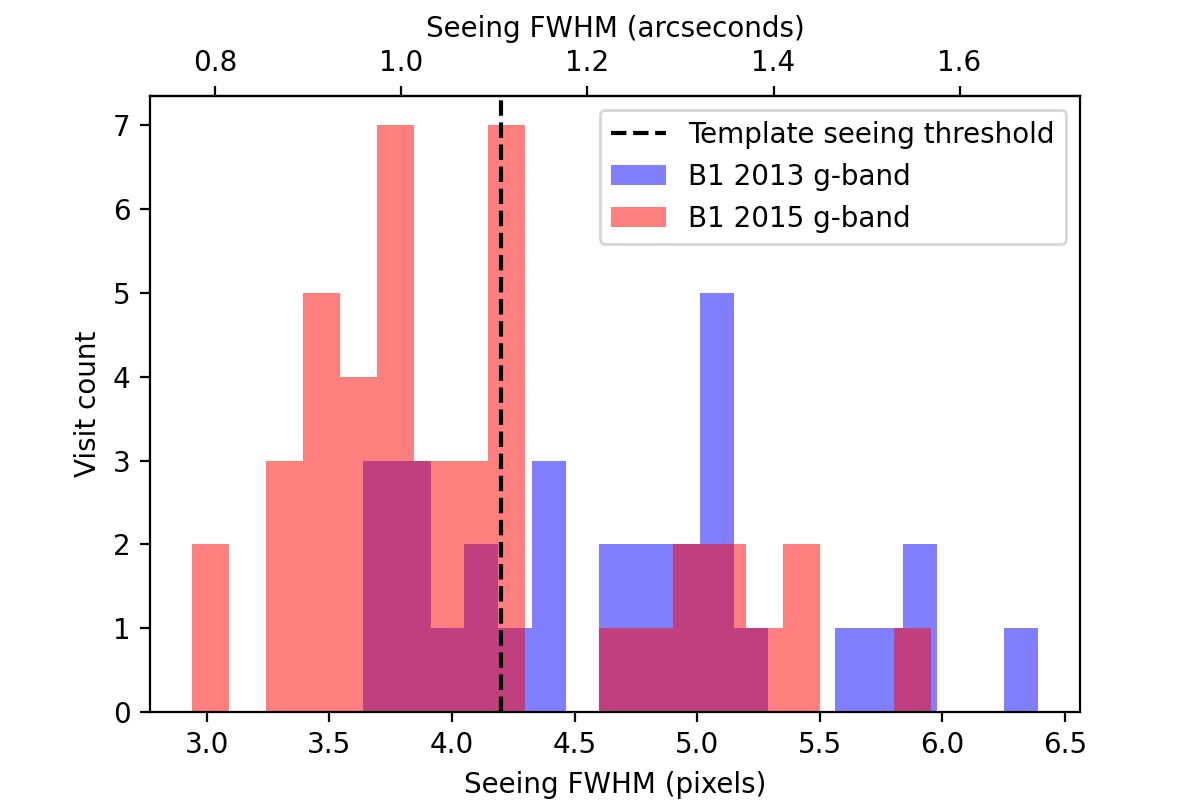

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(psf_B1_2013_g_dict.values(), 20, alpha=0.5, color='b')
plt.hist(psf_B1_2015_g_dict.values(), 20, alpha=0.5, color='r')
plt.xlabel('Seeing FWHM (pixels)')
plt.ylabel('Visit count')
secax = ax.secondary_xaxis('top', functions=(lambda x: x*pixelScale, lambda x: x/pixelScale))
secax.set_xlabel('Seeing FWHM (arcseconds)')
plt.axvline(x=4.2, color='k', linestyle="--")
plt.legend(["Template seeing threshold", "B1 2013 g-band", "B1 2015 g-band"])

<IPython.core.display.Javascript object>


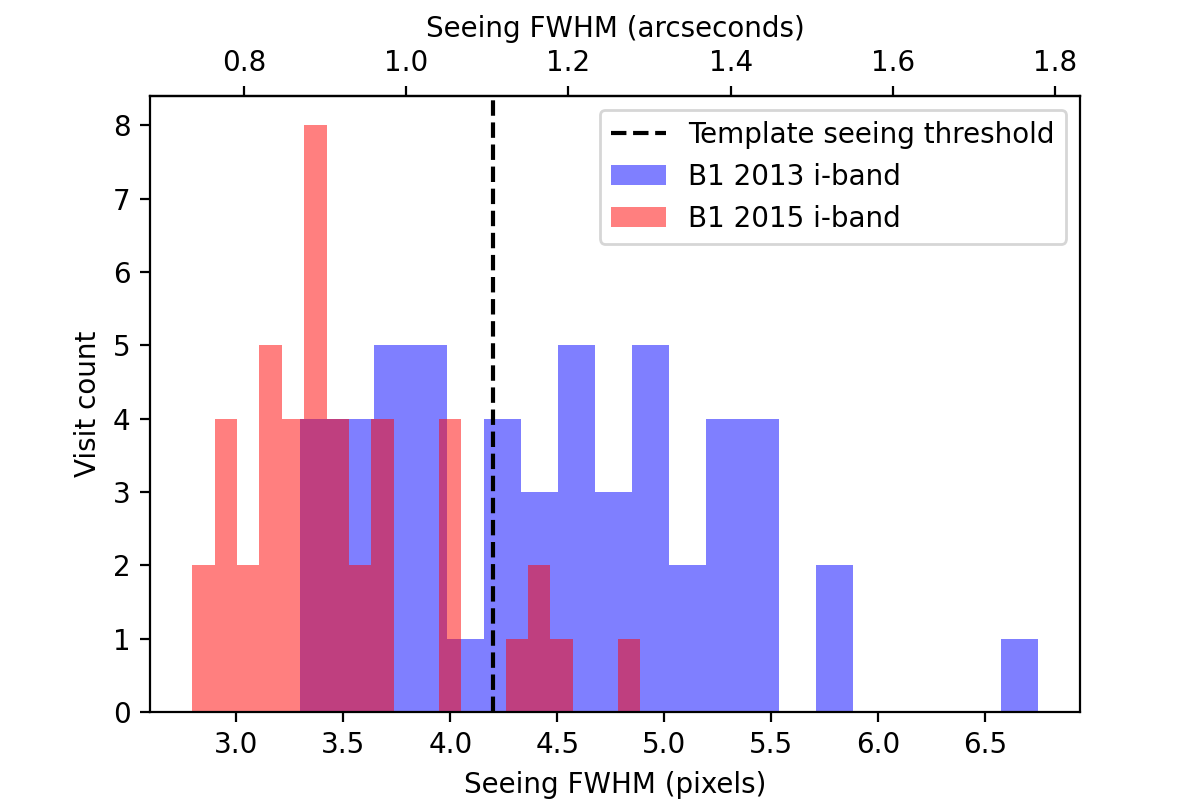

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(psf_B1_2013_i_dict.values(), 20, alpha=0.5, color='b')
plt.hist(psf_B1_2015_i_dict.values(), 20, alpha=0.5, color='r')
plt.xlabel('Seeing FWHM (pixels)')
plt.ylabel('Visit count')
secax = ax.secondary_xaxis('top', functions=(lambda x: x*pixelScale, lambda x: x/pixelScale))
secax.set_xlabel('Seeing FWHM (arcseconds)')
plt.axvline(x=4.2, color='k', linestyle="--")
plt.legend(["Template seeing threshold", "B1 2013 i-band", "B1 2015 i-band"])

<IPython.core.display.Javascript object>


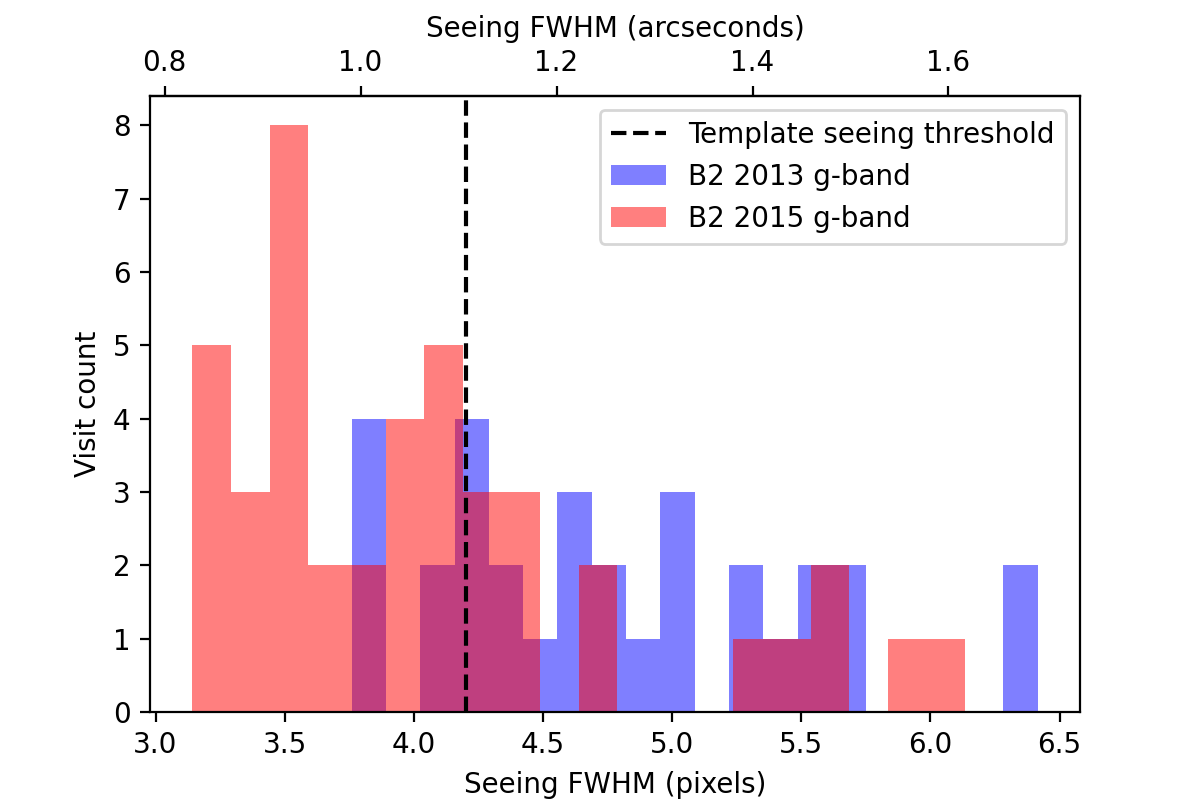

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(psf_B2_2013_g_dict.values(), 20, alpha=0.5, color='b')
plt.hist(psf_B2_2015_g_dict.values(), 20, alpha=0.5, color='r')
plt.xlabel('Seeing FWHM (pixels)')
plt.ylabel('Visit count')
secax = ax.secondary_xaxis('top', functions=(lambda x: x*pixelScale, lambda x: x/pixelScale))
secax.set_xlabel('Seeing FWHM (arcseconds)')
plt.axvline(x=4.2, color='k', linestyle="--")
plt.legend(["Template seeing threshold", "B2 2013 g-band", "B2 2015 g-band"])

<IPython.core.display.Javascript object>


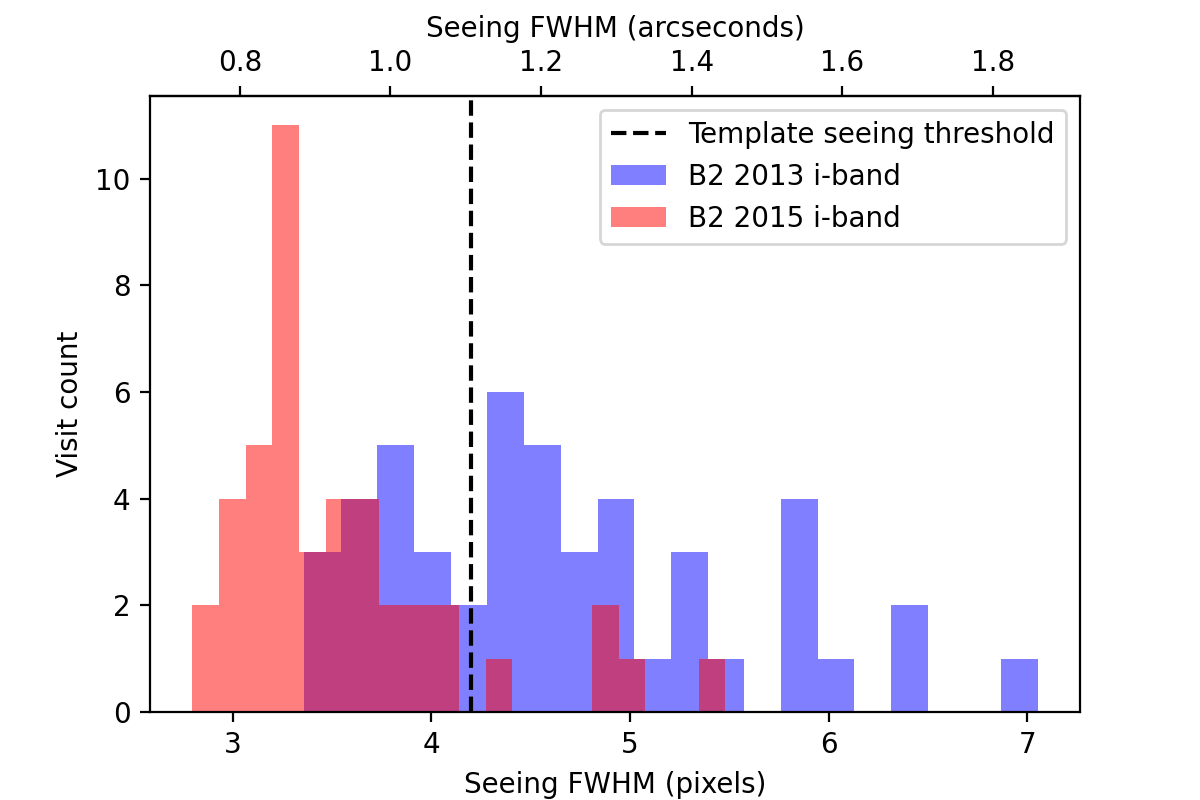

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(psf_B2_2013_i_dict.values(), 20, alpha=0.5, color='b')
plt.hist(psf_B2_2015_i_dict.values(), 20, alpha=0.5, color='r')
plt.xlabel('Seeing FWHM (pixels)')
plt.ylabel('Visit count')
secax = ax.secondary_xaxis('top', functions=(lambda x: x*pixelScale, lambda x: x/pixelScale))
secax.set_xlabel('Seeing FWHM (arcseconds)')
plt.axvline(x=4.2, color='k', linestyle="--")
plt.legend(["Template seeing threshold", "B2 2013 i-band", "B2 2015 i-band"])

# Estimate the amount of time it took to run Single Frame Measurement
Including:
* Instrument Signature Removal
* calibration
* PSF measurement 
* cosmic ray detection and repair
* source measurement and deblending
* source matching to a reference catalog
* astrometric calibration
* photometric calibration

The durations were calculated *really* simply: I ran `ls -g 0*/calexp/* > calexp_list.txt` in processed_data, then imported the output in Numbers, sanitized it, calculated the time stamp difference of sequential ccds, and calculated a histogram of those differences. ccd=1 was dropped every time, because I could not easily determine the previously written file. The histogram values are copied here.

In [4]:
duration_counts=[2821,7239,4579,2028,942,662,418,267,201,139,112,91,66,88,94,64,55,44,48,38,35,37,49,38,21,29,12,23,22,18,12,1,11,5,4,4,5,4,1,3,1,1,2,0,0,0,3,1,0,2,0,0,0,0,0,0,0,0,0,1]

In [5]:
durations=np.arange(1,61)

<IPython.core.display.Javascript object>


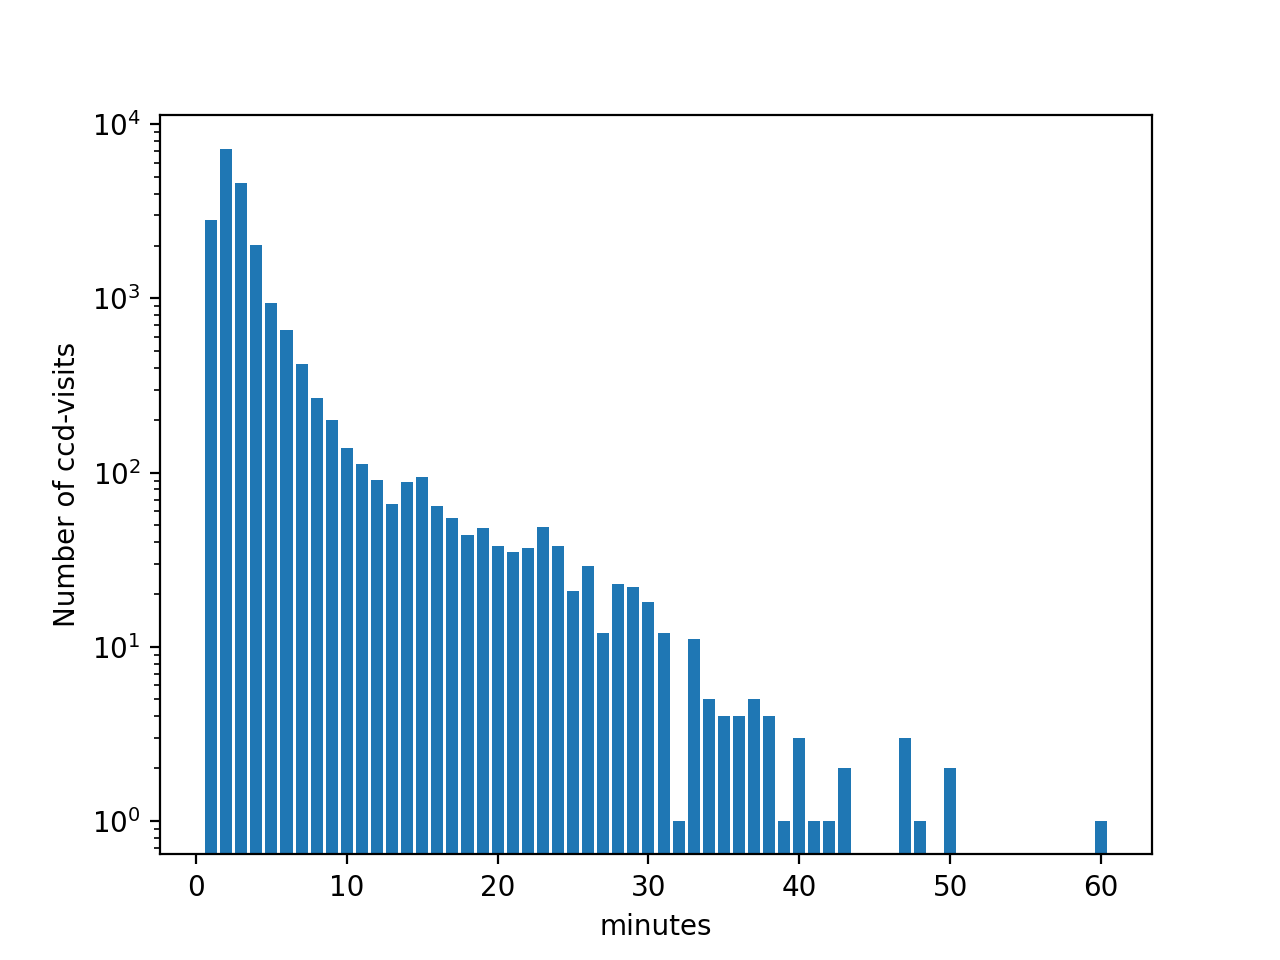

In [6]:
fig, ax = plt.subplots()
ax.bar(durations[0:60], height=duration_counts[0:60])
ax.set_yscale('log')
ax.set_xlabel('minutes')
ax.set_ylabel('Number of ccd-visits')
fig.show()